In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Przygotowanie danych

In [2]:
headers = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]

In [3]:
headers

['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

## Ładowanie danych

In [4]:
glassData = pd.read_csv("glass.data", names=headers, index_col=0)

In [5]:
glassData.groupby(["Type"]).count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


## TEST


In [6]:
(glassData.Fe > 0).head(10)

Id
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: Fe, dtype: bool

In [7]:
len(glassData[glassData.Mg>0])

172

In [8]:
glassData[glassData.Mg==0].size

420

## END TEST

In [9]:
glassData.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Zmiana wartości w *Type*

Typy o wartościach 5, 6, 7 będą odpowiednio reprezentowane przez typy 4, 5, 6

In [10]:
glassData.loc[glassData.Type > 4, 'Type'] = glassData.loc[glassData.Type > 4, 'Type'] - 1

In [11]:
glassData.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Zmiana dziedziny danych

In [12]:
discreteProperties = []

In [13]:
def setAsDiscreteValue(df, colname, values):
    df[colname] = values
    discreteProperties.append(colname)
    return

### Fe

x==0 -> False

x>0 -> True

In [14]:
setAsDiscreteValue(glassData, "Fe", glassData.Fe > 0)

In [15]:
discreteProperties

['Fe']

### Ba

In [16]:
setAsDiscreteValue(glassData, "Ba", glassData.Ba > 0)

In [17]:
discreteProperties

['Fe', 'Ba']

In [18]:
glassData.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,False,False,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,False,False,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,False,False,1


## Usuwanie danych

In [19]:
glassData = glassData.drop(columns=[])
# "K", "Ba", "Fe", "Ca", "Si", "Mg"])

In [20]:
glassData.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,False,False,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,False,False,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,False,False,1


## Zapis danych o kolumnach

In [21]:
classes = glassData.Type.unique()
classes

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [22]:
ingredients = glassData.columns.drop(['Type'])
ingredients

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [23]:
continuesIngredients = ingredients.drop(discreteProperties).values

continuesIngredients

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca'], dtype=object)

In [24]:
ingredients = ingredients.values
ingredients

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype=object)

## Mieszanie danych

ze względu na ich wstępne posortowanie względem *Type*

In [25]:
glassData = glassData.sample(frac=1)
glassData.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,False,True,1
124,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,False,False,2
32,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,False,False,1
176,1.52119,12.97,0.33,1.51,73.39,0.13,11.27,False,True,4
54,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,False,False,1


In [26]:
glassData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 70 to 11
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null bool
Fe      214 non-null bool
Type    214 non-null int64
dtypes: bool(2), float64(7), int64(1)
memory usage: 15.5 KB


# Podział na podzbiory

## Zbiór uczący
120 rekordów - 56% zbioru wejściowego

In [27]:
learning=glassData[:120]
learning.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,False,True,1
124,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,False,False,2
32,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,False,False,1


In [28]:
learning.groupby(["Type"]).count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,33,33,33,33,33,33,33,33,33
2,48,48,48,48,48,48,48,48,48
3,10,10,10,10,10,10,10,10,10
4,7,7,7,7,7,7,7,7,7
5,6,6,6,6,6,6,6,6,6
6,16,16,16,16,16,16,16,16,16


In [29]:
learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 70 to 185
Data columns (total 10 columns):
RI      120 non-null float64
Na      120 non-null float64
Mg      120 non-null float64
Al      120 non-null float64
Si      120 non-null float64
K       120 non-null float64
Ca      120 non-null float64
Ba      120 non-null bool
Fe      120 non-null bool
Type    120 non-null int64
dtypes: bool(2), float64(7), int64(1)
memory usage: 8.7 KB


In [30]:
learning.tail(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,True,False,6
209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,True,False,6
185,1.51115,17.38,0.0,0.34,75.41,0.00,6.65,False,False,5


## Zbiór testowy
60 rekordów - 28% zbioru wejśiowego

In [31]:
testing = glassData[120:180]
testing.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
67,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,False,True,1
30,1.51784,13.08,3.49,1.28,72.86,0.60,8.49,False,False,1
122,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,False,True,2


In [32]:
testing.tail(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
200,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,True,False,6
150,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,False,False,3
182,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,False,False,5


In [33]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 67 to 182
Data columns (total 10 columns):
RI      60 non-null float64
Na      60 non-null float64
Mg      60 non-null float64
Al      60 non-null float64
Si      60 non-null float64
K       60 non-null float64
Ca      60 non-null float64
Ba      60 non-null bool
Fe      60 non-null bool
Type    60 non-null int64
dtypes: bool(2), float64(7), int64(1)
memory usage: 4.3 KB


## Zbiór walidacyjny
pozostałe rekordy: 34 - 16 % zbioru

In [34]:
validation = glassData[180:]
validation.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
90,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,False,True,2
42,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,False,False,1
126,1.51872,12.93,3.66,1.56,72.51,0.58,8.55,False,True,2


In [35]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 90 to 11
Data columns (total 10 columns):
RI      34 non-null float64
Na      34 non-null float64
Mg      34 non-null float64
Al      34 non-null float64
Si      34 non-null float64
K       34 non-null float64
Ca      34 non-null float64
Ba      34 non-null bool
Fe      34 non-null bool
Type    34 non-null int64
dtypes: bool(2), float64(7), int64(1)
memory usage: 2.5 KB


## Odrzucanie obserwacji odstających

In [36]:
from scipy import stats
import numpy as np

In [37]:
lCopy = learning.copy()
len(lCopy)

120

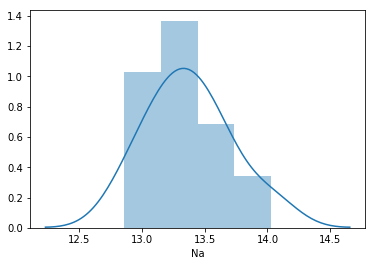

In [38]:
sns.distplot(lCopy[lCopy.Type==3].Na)

usuwa wpisy z danego dataframe *df* w obrębie grupy *group* i cechy *field* mniejsze niż *lowLimit* lub większe niż *tomLimit*

In [39]:
def removeValuesOfGroup(df, group, field, lowLimit, topLimit):
    toDrop = df[
        (df["Type"]==group) &
        ((df[field]>topLimit) |
        (df[field]<lowLimit))
    ]
    return df.drop(toDrop.index)

usuwa wartości w *df*, większe lub mniejsze 1,5 krotności różnicy między Q1 a Q3 w obrębie wybranej grupy *group*

zwraca dataframe *df* bez odstających rekordów

In [40]:
def removeValues(df, group, field):
    q3 = np.quantile(df[field], 0.75)
    q1 = np.quantile(df[field], 0.25)
    boxDist = q3 - q1
    outliersDist = boxDist*1.5
    topLimit = q3 + outliersDist
    lowLimit = q1 - outliersDist
    afterRemoval = removeValuesOfGroup(df, group, field, lowLimit, topLimit)
    return afterRemoval



In [41]:
def removeDfValues(df):
    for c in classes:
        for i in continuesIngredients:
            df = removeValues(df, c, i)
#             print(c, i, len(df))
    return df

In [42]:
learningCopy = learning.copy()

In [43]:
learning = removeDfValues(learning)

In [44]:
len(learning)

82

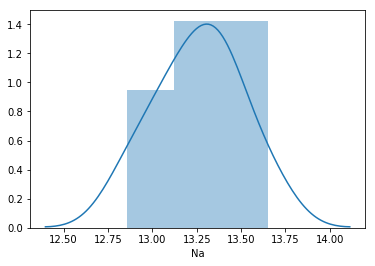

In [45]:
sns.distplot(learning[learning.Type==3].Na)

# OBLICZANIE P(X) DLA DYSKRETNYCH PRZED TYM?

## Wartości satatystyczne dla cech w obrębie klas

## Dla wartości ciągłych

In [46]:
continuesProperties = learning.columns.drop(discreteProperties)
continuesProperties

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Type'], dtype='object')

In [47]:
meanValues = pd.DataFrame(index=classes).join(learning[continuesProperties].groupby("Type").mean()).fillna(0)
meanValues

,RI,Na,Mg,Al,Si,K,Ca
1,1.518296,13.261667,3.555333,1.25800,72.68700,0.492667,8.557333
2,1.517110,13.237000,3.485750,1.46425,72.71025,0.567250,8.283250
3,1.516649,13.261250,3.497500,1.33250,72.69625,0.508750,8.511250
4,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
5,1.518808,14.085000,2.307500,1.50750,72.54500,0.000000,9.480000
6,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


In [48]:
stdValues = pd.DataFrame(index=classes).join(learning[continuesProperties].groupby("Type").std()).fillna(0)
stdValues

,RI,Na,Mg,Al,Si,K,Ca
1,0.001629,0.464632,0.295118,0.193843,0.593303,0.186602,0.480459
2,0.001356,0.451614,0.390646,0.217914,0.415090,0.158616,0.501221
3,0.000510,0.247354,0.101665,0.191143,0.152122,0.164615,0.169574
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000492,0.279821,0.109049,0.215619,0.199750,0.000000,0.235372
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Dla wartości dyskretnych

In [49]:
totalDiscreteValues = learning[["Ba","Fe", "Type"]].groupby("Type").count()
totalDiscreteValues

,Ba,Fe
Type,,
1,30,30
2,40,40
3,8,8
5,4,4


In [50]:
baPlus = learning[learning.Ba][["Ba", "Type"]].groupby("Type").count()
baPlus

,Ba
Type,
1,1
2,4


In [51]:
fePlus = learning[learning.Fe][["Fe", "Type"]].groupby("Type").count()
fePlus

,Fe
Type,
1,11
2,16
3,2


In [52]:
discreteConditionProbability = pd.DataFrame(index=classes).join(fePlus).join(baPlus).fillna(0)
discreteConditionProbability = (discreteConditionProbability/totalDiscreteValues).fillna(0)
discreteConditionProbability

,Ba,Fe
1,0.033333,0.366667
2,0.100000,0.400000
3,0.000000,0.250000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000


# Działania na zbiorze uczącym

## Obliczanie prawdopodobieństwa wystąpienia klasy

In [53]:
x = pd.Series(index=classes).fillna(0)
x

1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64

In [54]:
# x.join(classAPrioriProbability)

In [55]:
classAPrioriProbability = (learning.groupby('Type').size()+x).fillna(0)
classAPrioriProbability

1    30.0
2    40.0
3     8.0
4     0.0
5     4.0
6     0.0
dtype: float64

In [56]:
classAPrioriProbability = classAPrioriProbability/classAPrioriProbability.sum()
classAPrioriProbability

1    0.365854
2    0.487805
3    0.097561
4    0.000000
5    0.048780
6    0.000000
dtype: float64

## Podgląd rozkładu danych w cechach względem klas

In [57]:
def createFacetGridPlot(typecolname, datacolname="Type", dataset=learning, plottype=sns.distplot):
    g = sns.FacetGrid(dataset, col=datacolname, col_wrap=3, row_order=classes)
    g = g.map(plottype, typecolname)
    return g

C:\Users\WojciechH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\WojciechH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


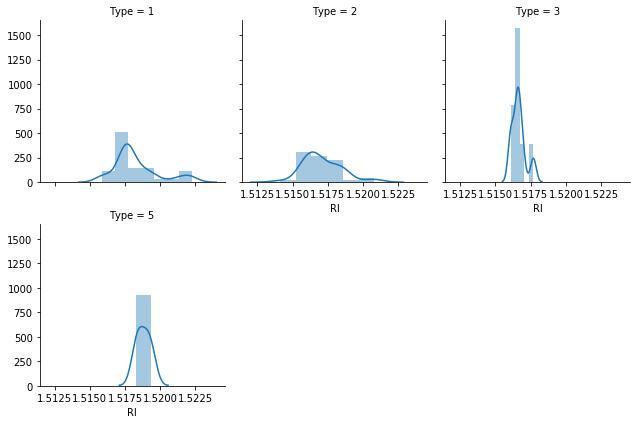

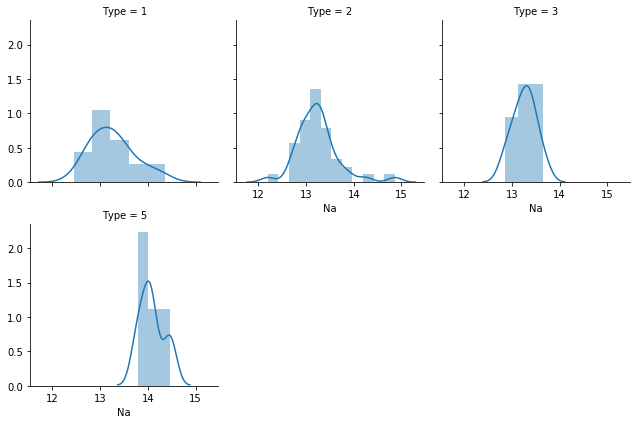

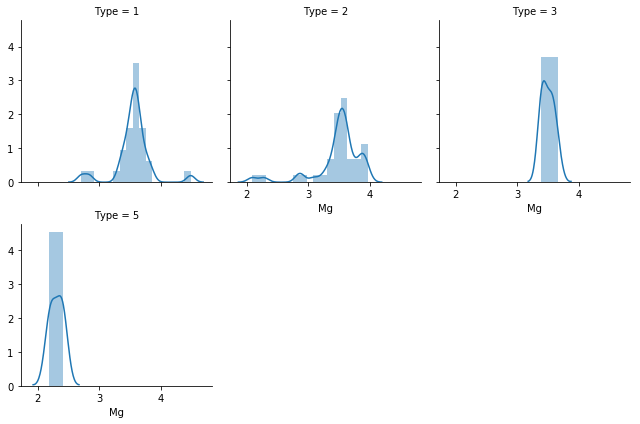

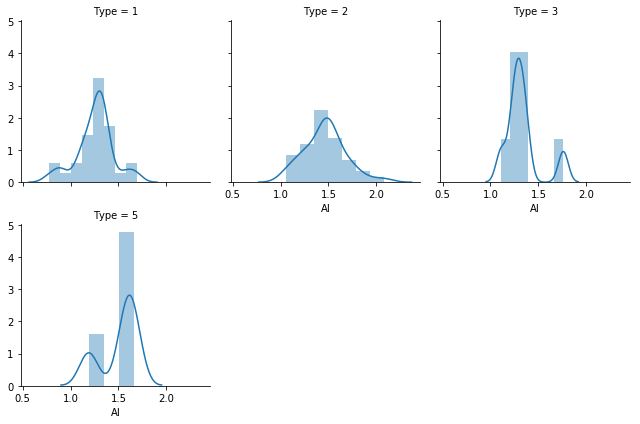

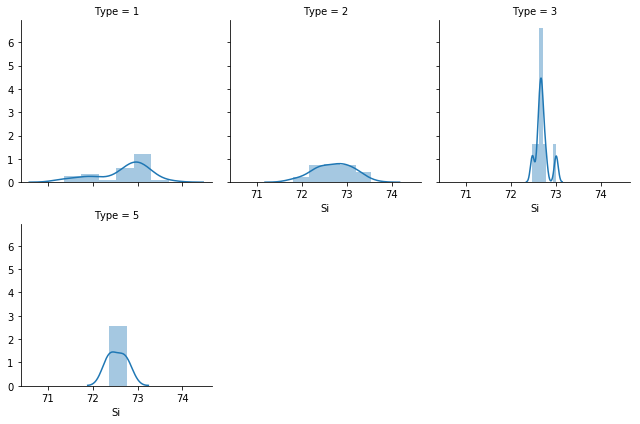

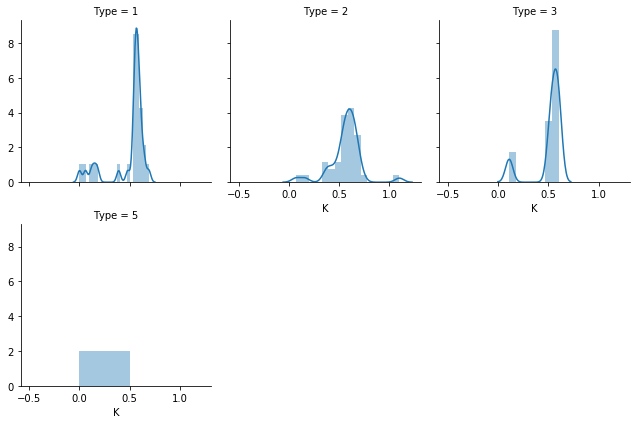

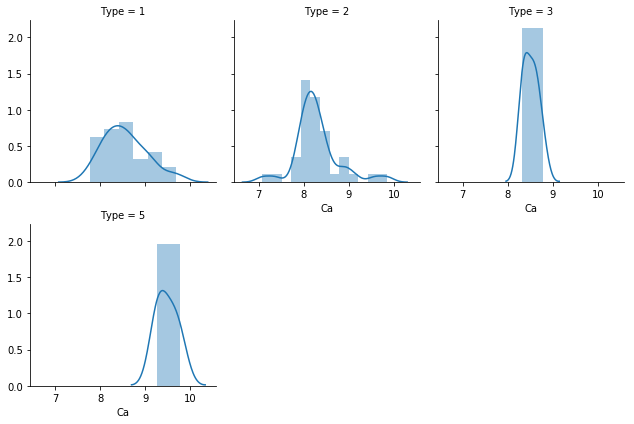

In [58]:
for ingredient in continuesIngredients:
    createFacetGridPlot(ingredient)

C:\Users\WojciechH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\WojciechH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\WojciechH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\WojciechH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\WojciechH\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  war

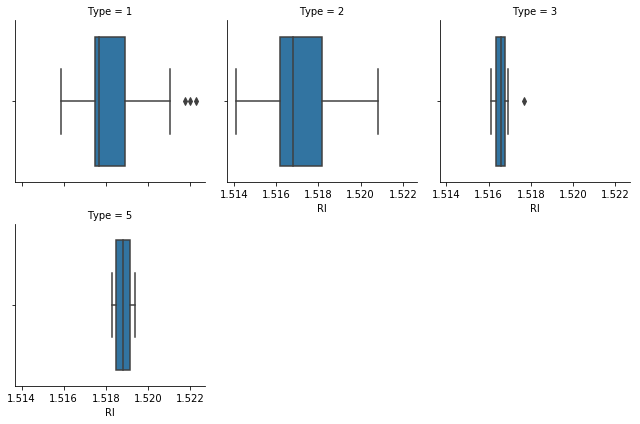

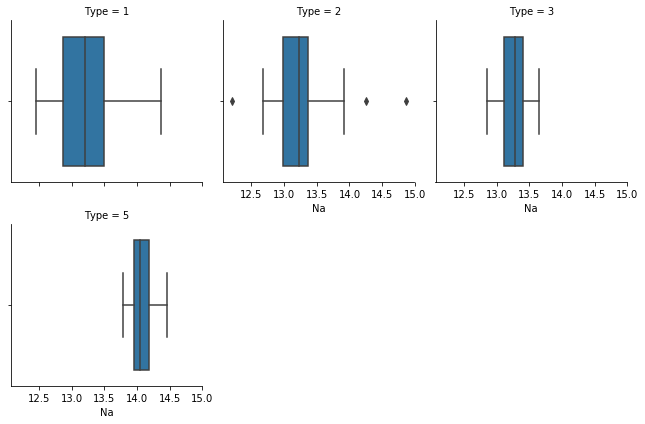

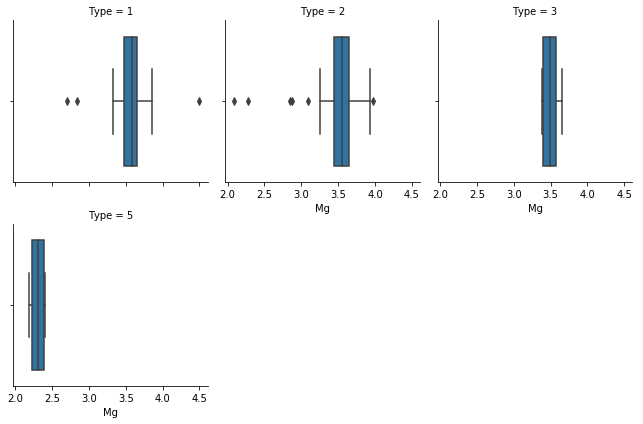

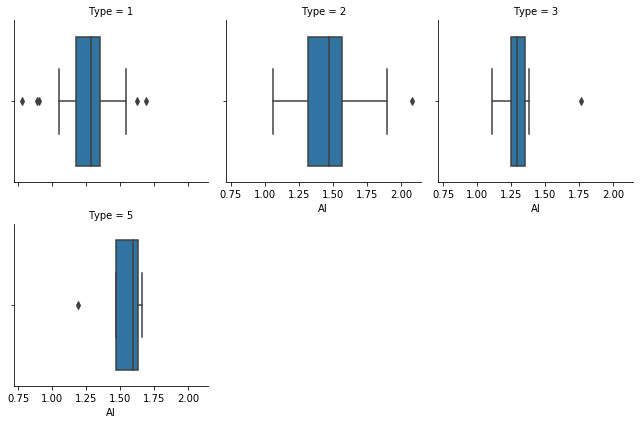

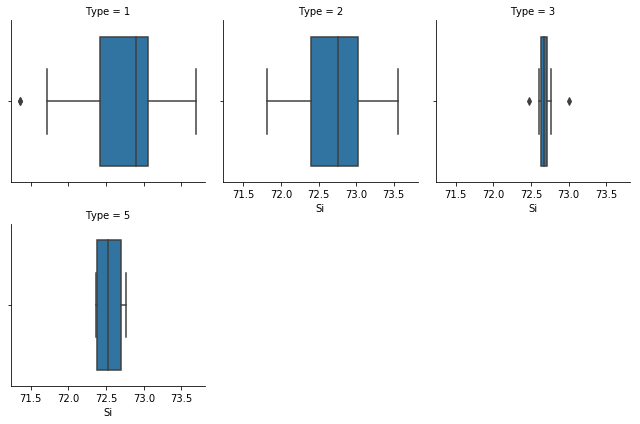

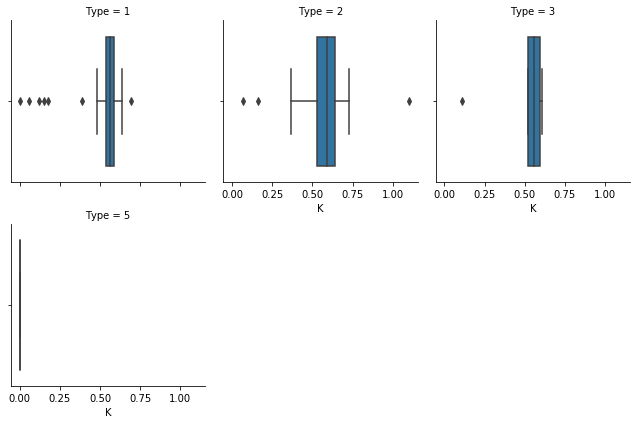

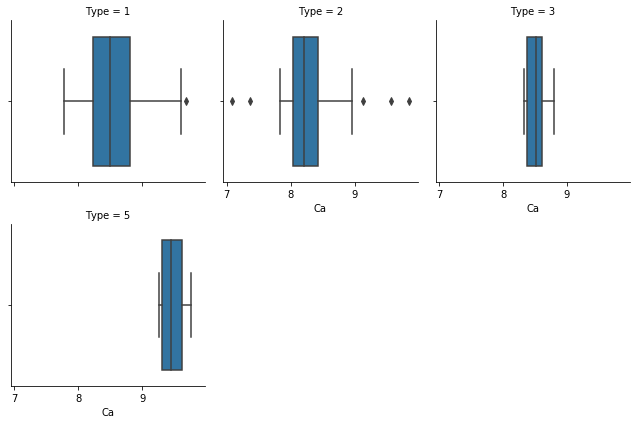

In [59]:
for ingredient in continuesIngredients:
    createFacetGridPlot(ingredient, plottype=sns.boxplot)

## P(x_i|C_i) dla funkcji ciągłej

prawdopodobieństwo f(x) estymowane funkcją gęstości Gaussa

**estymacja prawdopodobieństwa**



In [60]:
from scipy import stats

bazuje na gęstości prawdopodobieństwa!

In [61]:
def gaussianProbability(x, mean, std):
    maxValue = stats.norm(loc=mean, scale=std).pdf(mean)
    probability = stats.norm(loc=mean, scale=std).pdf(x)
    normalizedProbality = probability/maxValue
    return normalizedProbality

In [62]:
gaussianProbability(1, 1, 1)

1.0

funkcja działa na listach:

In [63]:
gaussianProbability([1, 0], [1, 1], [1, 1])

array([1.        , 0.60653066])

zamiana rekordu z DF do pary: (tablica *array* wartości cech, klasa)

In [64]:
discreteProperties + ["Type"]

['Fe', 'Ba', 'Type']

In [118]:
def recordToVector(record):
    testType = record["Type"]
    testVector = record[continuesIngredients].values
    return (testVector, testType)

In [140]:
v = learning.iloc[1][continuesIngredients]
v

RI    1.51747
Na      12.84
Mg        3.5
Al       1.14
Si      73.27
K        0.56
Ca       8.55
Name: 32, dtype: object

In [120]:
testV = recordToVector(learning.iloc[1])
testV

(array([1.51747, 12.84, 3.5, 1.14, 73.27, 0.56, 8.55], dtype=object), 1)

In [154]:
testMean = meanValues.loc[testV[1]].values.tolist()
testStd = stdValues.loc[testV[1]].values.tolist()

In [156]:
gaussianProbability(mean=testMean, std=testStd, x=testV[0].tolist())

array([0.87952557, 0.66245481, 0.98257629, 0.83087001, 0.61706186,
       0.93697129, 0.99988352])

**TEST**

In [66]:
(testRecord, typeOfRecord) = recordToVector(learning.iloc[0])
testRecord, typeOfRecord

(1.5170700000000001, 2)

In [67]:
typeOfRecord

2

In [227]:
gaussianProbability(testRecord, meanValues.loc[typeOfRecord], stdValues.loc[typeOfRecord])*(classAPrioriProbability.loc[typeOfRecord]+1)

array([1.48716590e+000, 8.53432203e-147, 4.54624684e-006, 1.44473453e+000,
       0.00000000e+000, 2.43217815e-008, 3.99036695e-040])

## P(X|C_i)

In [121]:
gaussianProbabilityC1 = gaussianProbability(testRecord, meanValues.loc[1], stdValues.loc[1])
gaussianProbabilityC2 = gaussianProbability(testRecord, meanValues.loc[2], stdValues.loc[2])

In [122]:
testGaussMatrix = [gaussianProbabilityC1, gaussianProbabilityC2]
testGaussMatrix

[array([7.53607527e-001, 1.80673119e-139, 4.38357280e-011, 4.09382011e-001,
        0.00000000e+000, 2.85547383e-007, 2.37109076e-047]),
 array([9.99570520e-001, 5.73618366e-147, 3.05567411e-006, 9.71051081e-001,
        0.00000000e+000, 1.63474269e-008, 2.68204992e-040])]

In [123]:
import numpy as np

In [246]:
def assignClassToVector(vector, weightWector):
    bestClass = 0
    bestValue = 0
    tempValue = 0
    for i in classes:
        tempVal = ''
        gaussianProb = gaussianProbability(
            vector, meanValues.loc[i].values, stdValues.loc[i].values
        )
#         print(gaussianProb)
        continuesProb = gaussianProb*weightWector.loc[continuesIngredients].values+1
        discreteProb = discreteConditionProbability.loc[i]*weightWector.loc[discreteProperties].values+1
#         print(tempValue)
#         print("XDDDD\n\n\n\n")
        tempValue = np.concatenate((continuesProb, discreteProb), axis=None)
#         print (tempValue)
#         print(tempValue)
        tempValue = np.prod(tempValue)#*(classAPrioriProbability.loc[i])
        
#         print(str(i) + " " + str(tempValue))
        if tempValue > bestValue:
            bestValue = tempValue
            bestClass = i
    return bestClass

            
# print("Pierwotna klasa: " + str(typeOfRecord))
# assignClassToVector(gaussianProbabilityC1)

In [229]:
def checkCorrectness(testingSet, weightWector):
    correctAssign = 0;
    incorrectAssign = 0;
    assignedClass = 0;
    for index, row in testingSet.iterrows():
#         print(index)
#         print(row) -> Series
        (recordVector, recordClass) = recordToVector(row)
#         print(recordVector)
        assignedClass = assignClassToVector(recordVector.tolist(), weightWector)
        if assignedClass == recordClass:
            correctAssign += 1
        else:
            incorrectAssign += 1
    return (correctAssign, incorrectAssign)

In [230]:
def printResult(y, n):
    print("y="+str(y) + " n="+ str(n))
    print(str((y/(y+n))*100)+" %")
    return

In [340]:
def defaultWeightWector(default=1):
    weightWector = pd.Series(index=ingredients)
    weightWector = weightWector.fillna(default)
    return weightWector

In [313]:
weightWector = pd.Series(index=ingredients)
weightWector = weightWector.fillna(1)
# weightWector.Na = 2
# weightWector.Mg = 2
# weightWector.Ba = 0.5
# weightWector.Fe = 0.5
# weightWector.Ca = 3
weightWector.Na = 1
weightWector.Mg = 1
weightWector.Ba = 1
weightWector.Fe = 1
weightWector.Ca = 3.2

In [295]:
(y, n) = checkCorrectness(testing, weightWector=weightWector)
printResult(y, n)

C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1662: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


y=35 n=25
58.333333333333336 %


In [305]:
weightWector.index.values

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype=object)

In [338]:
best_f = 0;
res_best_f = 0;
xs = np.arange(0, 7.5, 0.1)
pdRes = pd.DataFrame(index=xs)
# pdRes["XD"] = res
# pdRes
for i in weightWector.index.values:
    res = []
    weightWector = defaultWeightWector()
    best_f = 0;
    res_best_f = 0;
    for f in xs:
        weightWector[i] = f
        parameterRes = checkCorrectness(testing, weightWector)
        if (parameterRes[0]>res_best_f):
            best_f = f
            res_best_f = parameterRes[0]
        res.append(parameterRes[0])
    print([i, best_f, res_best_f])
    pdRes[i] = res
#     plot = sns.lineplot(x=xs, y=res, label=i)
#     plot.set(xlabel="best " + str(best_f))

C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1662: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


['RI', 0.0, 37]
['Na', 0.0, 33]
['Mg', 0.2, 34]
['Al', 2.2, 35]
['Si', 0.0, 34]
['K', 0.0, 35]
['Ca', 6.800000000000001, 36]
['Ba', 0.0, 34]
['Fe', 0.0, 35]


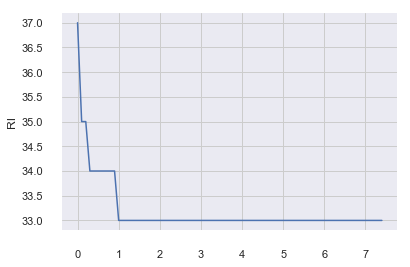

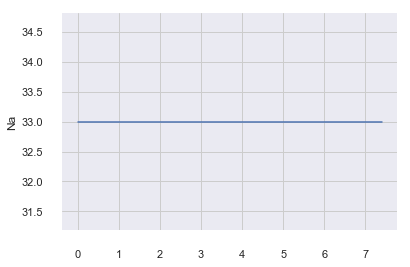

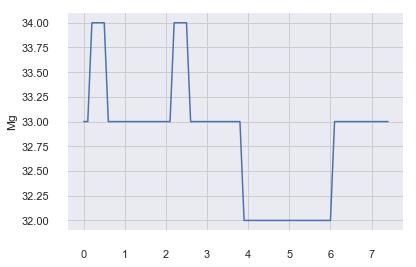

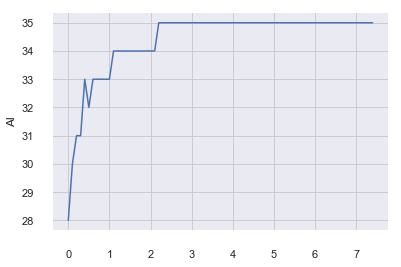

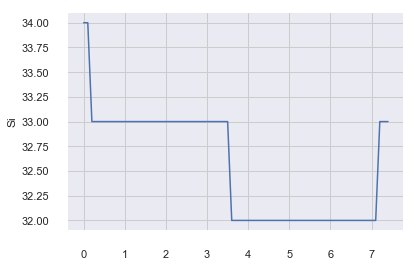

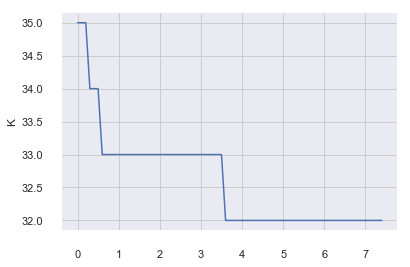

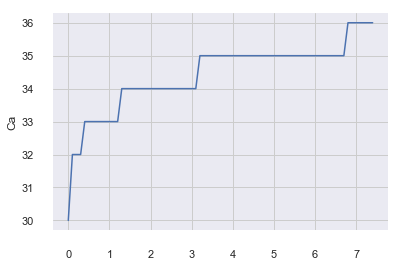

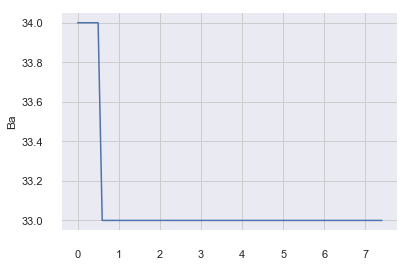

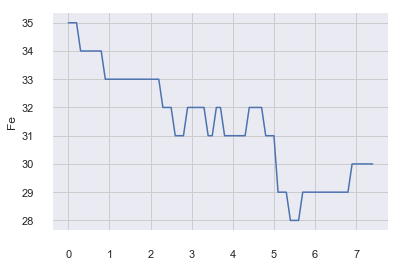

In [339]:
for c in pdRes.columns.values:
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style="ticks")
    sns.lineplot(x=xs, y=c, data=pdRes)  # column is chosen here
    sns.despine(offset=10, trim=True) 

[Text(0.5, 0, 'asdasd')]

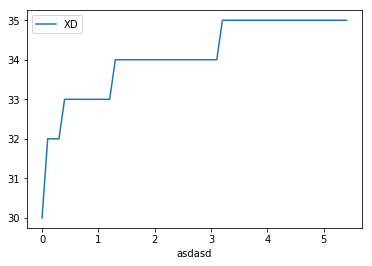

In [302]:
plot = sns.lineplot(x=xs, y=res, label="XD")
plot.set(xlabel="asdasd")

In [352]:
weightWector = defaultWeightWector(0)
weightWector.Ca = 6.8
weightWector.Mg = 0.2
weightWector.Al = 2.2
(y, n) = checkCorrectness(testing, weightWector)
printResult(y, n)

C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1662: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


y=39 n=21
65.0 %


In [353]:
(y, n) = checkCorrectness(validation, weightWector)
printResult(y, n)

C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1662: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


y=12 n=22
35.294117647058826 %


In [396]:
weightWector = defaultWeightWector(1)
# weightWector.Na = 2
# weightWector.Mg = 2
# weightWector.Ba = 0.5
# weightWector.Fe = 0.5
# weightWector.Ca = 3
weightWector.Si = 10
weightWector.Na = 2
weightWector.Mg = 9.4
weightWector.Ba = 1
weightWector.Fe = 0.2
weightWector.Ca = 1.2
(y, n) = checkCorrectness(validation, weightWector)
printResult(y, n)

C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1662: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\WojciechH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


y=16 n=18
47.05882352941176 %


USUWANIE OBSERWACJI ODSTAJĄCYCH ZE ZBIORU UCZĄCEGO